In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from datetime import datetime, timedelta
np.random.seed(1)

In [9]:
parse_dates=['date_created','date_deadline','date_launched','date_ended']
ks_2019 = pd.read_csv('./ks_2019_columns_added.csv', parse_dates=parse_dates)

In [10]:
ks_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44158 entries, 0 to 44157
Data columns (total 57 columns):
backers_count               44158 non-null int64
blurb                       44158 non-null object
category                    44158 non-null object
category_name               44158 non-null object
category_specific           44158 non-null object
converted_pledged_amount    44158 non-null int64
country                     44158 non-null object
country_displayable_name    44158 non-null object
created_at                  44158 non-null int64
date_created                44158 non-null datetime64[ns]
creator                     44158 non-null object
currency                    44158 non-null object
currency_symbol             44158 non-null object
currency_trailing_code      44158 non-null bool
current_currency            44158 non-null object
deadline                    44158 non-null int64
date_deadline               44158 non-null datetime64[ns]
disable_communication       441

In [11]:
ks_2019.shape

(44158, 57)

In [21]:
ks_2019['goal'].describe() # goal컬럼 현재 값 in local currency --> usd로 변경 필요

count    4.415800e+04
mean     3.753451e+04
std      8.173877e+05
min      1.000000e+00
25%      1.000000e+03
50%      5.000000e+03
75%      1.400000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [54]:
print("max:",ks_2019['goal'].max())
print("min:",ks_2019['goal'].min())
print("mean:",ks_2019['goal'].mean())
print("median:",ks_2019['goal'].median())
print("mode:",ks_2019['goal'].mode())
print("std:",ks_2019['goal'].std())
print("25%:",ks_2019['goal'].quantile(0.25))
print("50%:",ks_2019['goal'].quantile(0.5))
print("75%:",ks_2019['goal'].quantile(0.75))
print("null/nan 수: ", ks_2019['goal'].isna().sum())

max: 100000000.0
min: 1.0
mean: 37534.509669822
median: 5000.0
mode: 0    5000.0
dtype: float64
std: 817387.6859548201
25%: 1000.0
50%: 5000.0
75%: 14000.0
null/nan 수:  0


In [22]:
plt.scatter(x=ks_2019['goal'].index, y=ks_2019['goal'].values)
plt.show()

In [23]:
ks_2019.columns

Index(['backers_count', 'blurb', 'category', 'category_name',
       'category_specific', 'converted_pledged_amount', 'country',
       'country_displayable_name', 'created_at', 'date_created', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'date_deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at',
       'date_launched', 'date_launched_year', 'location', 'location_name',
       'name', 'permissions', 'photo', 'photo_link', 'pledged', 'profile',
       'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'date_ended', 'static_usd_rate', 'urls', 'urls_web',
       'url_project', 'url_reward', 'usd_pledged', 'usd_type',
       'fund_recruitment_period', 'set_fundraising_period',
       'actual_time_taken', 'date_launched_month', 'date_launched_day',
       'launching_delay_time', 'target_goal_period_

In [25]:
ks_2019['current_currency'].value_counts()

USD    44014
CAD       48
GBP       48
AUD       36
EUR       12
Name: current_currency, dtype: int64

In [39]:
ks_2019['converted_pledged_amount']

0         709
1          82
2        1153
3        7415
4           1
         ... 
44153    2727
44154    2799
44155       2
44156    1045
44157      93
Name: converted_pledged_amount, Length: 44158, dtype: int64

In [36]:
ks_2019['usd_pledged']

0         719.756813
1          82.000000
2        1147.105655
3        7415.000000
4           1.000000
            ...     
44153    2723.797269
44154    2811.394401
44155       2.255394
44156    1045.000000
44157      93.000000
Name: usd_pledged, Length: 44158, dtype: float64

In [31]:
ks_2019['fx_rate'].head()

0    1.108973
1    1.000000
2    1.313810
3    1.000000
4    1.000000
Name: fx_rate, dtype: float64

In [33]:
ks_2019['static_usd_rate'].head()

0    1.140661
1    1.000000
2    1.290333
3    1.000000
4    1.000000
Name: static_usd_rate, dtype: float64

In [ ]:
#위 두 rate들을 ks_2019['pledged']에 각각 곱해보았다

In [43]:
ks_2019['pledged']*ks_2019['fx_rate'] # != converted_pledged_amount (다르다)

0         699.762127
1          82.000000
2        1167.977197
3        7415.000000
4           1.000000
            ...     
44153    2597.700444
44154    2829.290093
44155       2.217947
44156    1045.000000
44157      93.000000
Length: 44158, dtype: float64

In [35]:
ks_2019['pledged']*ks_2019['static_usd_rate'] # == usd_pledged (같다))

0         719.756813
1          82.000000
2        1147.105655
3        7415.000000
4           1.000000
            ...     
44153    2723.797269
44154    2811.394401
44155       2.255394
44156    1045.000000
44157      93.000000
Length: 44158, dtype: float64

In [44]:
# goal 값들에 static_usd_rate를 곱해주어 usd로 만들었다
usd_goal_2019 = ks_2019['goal']*ks_2019['static_usd_rate']
usd_goal_2019

0          684.396336
1        30000.000000
2         1009.040070
3         7000.000000
4        10000.000000
             ...     
44153      393.166059
44154     1305.500070
44155     7893.879210
44156    20000.000000
44157      700.000000
Length: 44158, dtype: float64

In [45]:
usd_goal_2019.max()

100000000.0

In [46]:
usd_goal_2019.min()

0.5114279

In [47]:
usd_goal_2019.mean()

20833.933006891362

In [55]:
print("max:",usd_goal_2019.max())
print("min:",usd_goal_2019.min())
print("mean:",usd_goal_2019.mean())
print("median:",usd_goal_2019.median())
print("mode:",usd_goal_2019.mode())
print("std:",usd_goal_2019.std())
print("25%:",usd_goal_2019.quantile(0.25))
print("50%:",usd_goal_2019.quantile(0.5))
print("75%:",usd_goal_2019.quantile(0.75))
print("null/nan 수: ", usd_goal_2019.isna().sum())

max: 100000000.0
min: 0.5114279
mean: 20833.933006891362
median: 4000.0
mode: 0    10000.0
dtype: float64
std: 601814.6142030584
25%: 1000.0
50%: 4000.0
75%: 10495.2904125
null/nan 수:  0


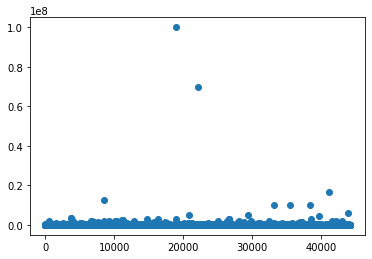

In [56]:
plt.scatter(x=usd_goal_2019.index, y=usd_goal_2019.values)
plt.show()

#여전히 이상치가 존재하는 것 같다
#실제 페이지 확인해보고 처리 여부 결정

In [58]:
ks_2019['usd_goal'] = usd_goal_2019 # usd로 변경한 goal --> usd_goal --> 새 컬럼으로 추가

In [59]:
ks_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44158 entries, 0 to 44157
Data columns (total 58 columns):
backers_count               44158 non-null int64
blurb                       44158 non-null object
category                    44158 non-null object
category_name               44158 non-null object
category_specific           44158 non-null object
converted_pledged_amount    44158 non-null int64
country                     44158 non-null object
country_displayable_name    44158 non-null object
created_at                  44158 non-null int64
date_created                44158 non-null datetime64[ns]
creator                     44158 non-null object
currency                    44158 non-null object
currency_symbol             44158 non-null object
currency_trailing_code      44158 non-null bool
current_currency            44158 non-null object
deadline                    44158 non-null int64
date_deadline               44158 non-null datetime64[ns]
disable_communication       441

In [88]:
#ks_2019.to_csv('ks_2019_columns_added.csv', index=False, encoding='utf-8')

In [83]:
ks_2019.sort_values(by=['usd_goal'], ascending=False)[['usd_goal','url_project']].head().values

array([[100000000.0,
        'https://www.kickstarter.com/projects/135274741/eclipse-0?ref=discovery_category_newest'],
       [70000000.0,
        'https://www.kickstarter.com/projects/1712331947/susie-homemakertm-enterprises-she-network-company?ref=discovery_category_newest'],
       [16821900.0,
        'https://www.kickstarter.com/projects/fire-kill-line/fire-kill-line?ref=discovery_category_newest'],
       [12500000.0,
        'https://www.kickstarter.com/projects/justinmlawrence/ongoing-missions-the-worlds-largest-spaceship-simu?ref=discovery_category_newest'],
       [10000000.0,
        'https://www.kickstarter.com/projects/wargore/wargore?ref=discovery_category_newest']],
      dtype=object)

In [ ]:
#응?.. top 두 개를 조회했더니 canceled 된 펀딩이 있네?
#successful, failed 데이터셋으로 작업하고 있는 줄 알았는데
#돌이켜보니, 원래 kickstarter_2019.csv 데이터는 successful, failed 외에 모든 state 다 가지고 있던 데이터셋

In [84]:
ks_2019['state'].value_counts()

successful    30002
failed         7201
live           6063
canceled        845
suspended        47
Name: state, dtype: int64

In [87]:
# successful, failed 데이터로만 다시 데이터셋 만들고 저장

ks_2019 = ks_2019[ks_2019['state'].isin(['successful','failed'])]
ks_2019.shape

(37203, 58)

In [ ]:
#ks_2019.to_csv('ks_2019_updated.csv', index=False, encoding='utf-8')

In [91]:
ks_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37203 entries, 0 to 44157
Data columns (total 58 columns):
backers_count               37203 non-null int64
blurb                       37203 non-null object
category                    37203 non-null object
category_name               37203 non-null object
category_specific           37203 non-null object
converted_pledged_amount    37203 non-null int64
country                     37203 non-null object
country_displayable_name    37203 non-null object
created_at                  37203 non-null int64
date_created                37203 non-null datetime64[ns]
creator                     37203 non-null object
currency                    37203 non-null object
currency_symbol             37203 non-null object
currency_trailing_code      37203 non-null bool
current_currency            37203 non-null object
deadline                    37203 non-null int64
date_deadline               37203 non-null datetime64[ns]
disable_communication       372

In [90]:
ks_2019['state'].value_counts()

successful    30002
failed         7201
Name: state, dtype: int64

In [89]:
print("max:",ks_2019['usd_goal'].max())
print("min:",ks_2019['usd_goal'].min())
print("mean:",ks_2019['usd_goal'].mean())
print("median:",ks_2019['usd_goal'].median())
print("mode:",ks_2019['usd_goal'].mode())
print("std:",ks_2019['usd_goal'].std())
print("25%:",ks_2019['usd_goal'].quantile(0.25))
print("50%:",ks_2019['usd_goal'].quantile(0.5))
print("75%:",ks_2019['usd_goal'].quantile(0.75))
print("null/nan 수: ", ks_2019['usd_goal'].isna().sum())

max: 100000000.0
min: 0.5114279
mean: 17009.71709245365
median: 3684.29973
mode: 0    5000.0
dtype: float64
std: 532309.2513937327
25%: 1000.0
50%: 3684.29973
75%: 10000.0
null/nan 수:  0


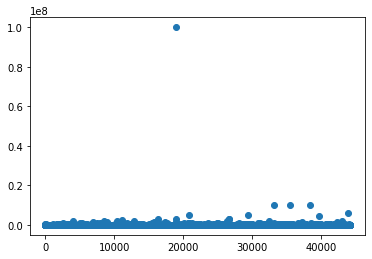

In [96]:
plt.scatter(x=ks_2019['usd_goal'].index, y=ks_2019['usd_goal'].values)
plt.show()
#저 이상치 하나는 여전히 있네...

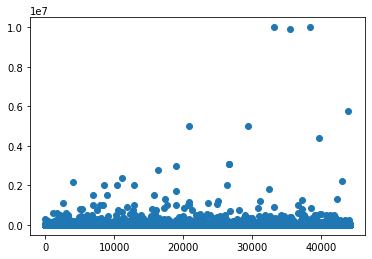

In [97]:
plt.scatter(x=ks_2019['usd_goal'].sort_values(ascending=False)[1:].index, y=ks_2019['usd_goal'].sort_values(ascending=False)[1:].values)
plt.show()
#제일 큰 값을 제거해 보았는데, 다른 이상치들도 많은 것 같음

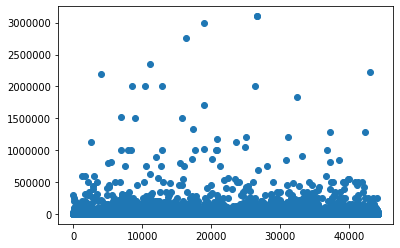

In [121]:
plt.scatter(x=ks_2019['usd_goal'].sort_values(ascending=False)[8:].index, y=ks_2019['usd_goal'].sort_values(ascending=False)[8:].values)
plt.show()

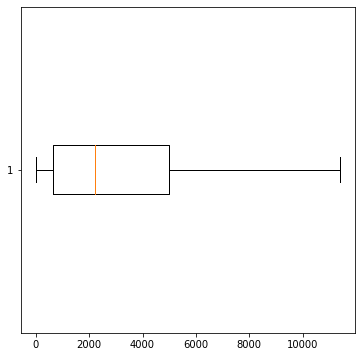

In [116]:
plt.figure(figsize=(6,6))
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(ks_2019['usd_goal'].sort_values(ascending=False)[8200:], flierprops=red_square, vert=False, whis=1.5) # whis 기본값: 1.5
plt.show() #8200번째 쯤 되어야 이상치가 하나도 안 보인다

In [ ]:
# usd_goal(목표 모금액)을 예측변수로 사용하려면 scaling 필요; 하지만 사용 할 필요가 있을까?

In [122]:
df_corr = ks_2019.corr()
df_corr

backers_count  converted_pledged_amount  created_at  \
backers_count                  1.000000                  0.752692   -0.007040   
converted_pledged_amount       0.752692                  1.000000   -0.004367   
created_at                    -0.007040                 -0.004367    1.000000   
currency_trailing_code         0.021140                  0.021253   -0.042339   
deadline                       0.018451                  0.016813    0.435621   
disable_communication               NaN                       NaN         NaN   
fx_rate                       -0.000797                  0.000922   -0.003194   
goal                           0.026180                  0.025354   -0.000328   
id                            -0.006453                 -0.005743   -0.006413   
is_starrable                        NaN                       NaN         NaN   
launched_at                    0.018482                  0.014462    0.441868   
date_launched_year                  NaN                       NaN         NaN   
pledged                        0.157998                  0.207424    0.001763   
spotlight                      0.094306                  0.065369    0.001316   
staff_pick                     0.115052                  0.108314   -0.026140   
state_changed_at               0.018451                  0.016813    0.435621   
static_usd_rate                0.000199                  0.002166   -0.012708   
usd_pledged                    0.752836                  0.999975   -0.004410   
fund_recruitment_period       -0.000766                  0.016976   -0.059189   
set_fundraising_period        -0.000766                  0.016976   -0.059189   
actual_time_taken             -0.000766                  0.016976   -0.059189   
date_launched_month            0.019227                  0.014604    0.439214   
date_launched_day             -0.007558                 -0.000808    0.012665   
launching_delay_time           0.017251                  0.012226   -0.889733   
target_goal_period_rate        0.042966                  0.038193    0.000054   
usd_goal                       0.011798                  0.015059    0.001076   

                          currency_trailing_code  deadline  \
backers_count                           0.021140  0.018451   
converted_pledged_amount                0.021253  0.016813   
created_at                             -0.042339  0.435621   
currency_trailing_code                  1.000000 -0.010168   
deadline                               -0.010168  1.000000   
disable_communication                        NaN       NaN   
fx_rate                                -0.481651 -0.013112   
goal                                   -0.014924  0.001717   
id                                      0.010534 -0.012710   
is_starrable                                 NaN       NaN   
launched_at                            -0.010532  0.990914   
date_launched_year                           NaN       NaN   
pledged                                -0.016092  0.010571   
spotlight                               0.016050 -0.017263   
staff_pick                             -0.001537 -0.016249   
state_changed_at                       -0.010168  1.000000   
static_usd_rate                        -0.457848 -0.031227   
usd_pledged                             0.021154  0.016688   
fund_recruitment_period                 0.003004  0.038167   
set_fundraising_period                  0.003004  0.038167   
actual_time_taken                       0.003004  0.038168   
date_launched_month                    -0.009846  0.985959   
date_launched_day                      -0.007747  0.020290   
launching_delay_time                    0.041830  0.018695   
target_goal_period_rate                -0.017137 -0.002063   
usd_goal                                0.002590  0.007166   

                          disable_communication   fx_rate      goal        id  \
backers_count                               NaN -0.000797  0.026180 -0.006453   
c

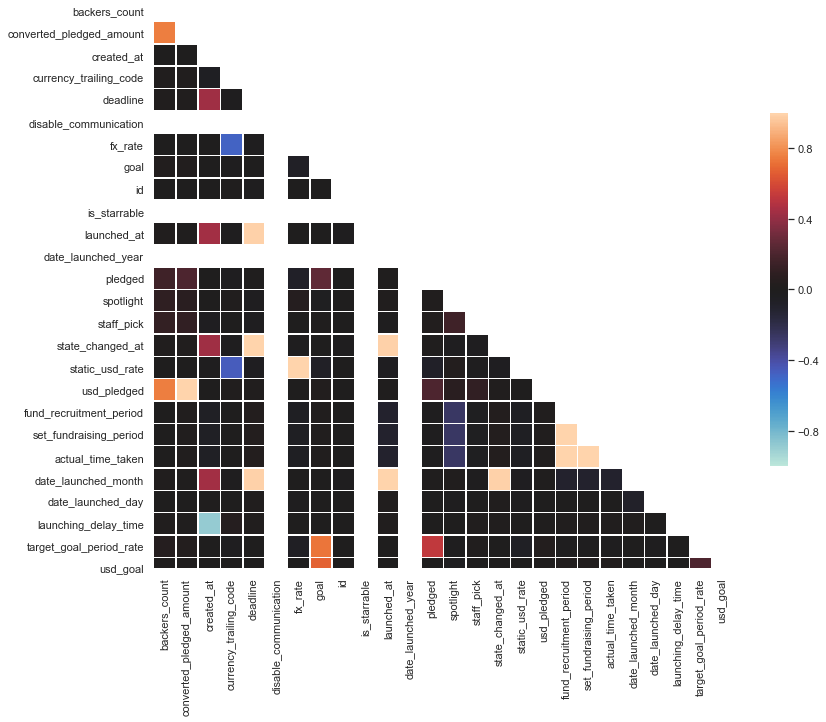

In [163]:
f, ax = plt.subplots(figsize=(13, 13))
sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, vmin=-1, vmax=1, center=0, mask=mask
            , square=True, linewidths=.5, cbar_kws={"shrink": .5}
            #, cmap=cmap
            #, xticklabels=df_corr.columns, yticklabels=df_corr.columns
            )
plt.show()

In [ ]:
category_name
category_specific
location_name
country_displayable_name
goal
created_at (or date_created)
launched_at (or date_launched)
deadline (or date_deadline)
date_launched_year
disable_communication
is_starrable
fund_recruitment_period : date_deadline-date_launched
or set_fundraising_period -- in seconds : deadline-launched_at

+
date_launched_month
date_launched_day (?)
launching_delay_time : launched_at-created_at or date_launched-date_created
goal/set_fundraising_period : 지정한 펀딩기간 대비 목표 모금액
or set_fundraising_period/goal : 목표 모금액 대비 지정한 펀딩기간 -- 이건 비상식적인 것 같음

In [ ]:
X:
category_name
country_displayable_name
disable_communication
is_starrable
location_name
set_fundraising_period
date_launched_month
date_launched_day
launching_delay_time
target_goal_period_rate
usd_goal
title
subtitle

y:
state

In [8]:
# 2019년 데이터 전처리 시작
parse_dates=['date_created','date_deadline','date_launched','date_ended']
ks_2019_overall_dataset = pd.read_csv('./data_2019/ks_2019_updated.csv', parse_dates=parse_dates)

In [9]:
ks_2019_overall_dataset.shape

(37203, 58)

In [10]:
ks_2019_overall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37203 entries, 0 to 37202
Data columns (total 58 columns):
backers_count               37203 non-null int64
blurb                       37203 non-null object
category                    37203 non-null object
category_name               37203 non-null object
category_specific           37203 non-null object
converted_pledged_amount    37203 non-null int64
country                     37203 non-null object
country_displayable_name    37203 non-null object
created_at                  37203 non-null int64
date_created                37203 non-null datetime64[ns]
creator                     37203 non-null object
currency                    37203 non-null object
currency_symbol             37203 non-null object
currency_trailing_code      37203 non-null bool
current_currency            37203 non-null object
deadline                    37203 non-null int64
date_deadline               37203 non-null datetime64[ns]
disable_communication       372

In [19]:
ks_2019 = ks_2019_overall_dataset[['category_name',
                                   'country_displayable_name',
                                   'disable_communication',
                                   'is_starrable',
                                   'location_name',
                                   'set_fundraising_period',
                                   'date_launched_month',
                                   #'date_launched_day',
                                   'launching_delay_time',
                                   'target_goal_period_rate',
                                   'usd_goal',
                                   'state']]
ks_2019

category_name country_displayable_name  disable_communication  \
0      Children's Books                   France                  False   
1                  Apps        the United States                  False   
2        Graphic Novels       the United Kingdom                  False   
3       Science Fiction        the United States                  False   
4                  Apps        the United States                  False   
...                 ...                      ...                    ...   
37198       Accessories                Australia                  False   
37199       Accessories       the United Kingdom                  False   
37200               Web                  Germany                  False   
37201             Faith        the United States                  False   
37202          Textiles        the United States                  False   

       is_starrable location_name  set_fundraising_period  \
0             False   Ste.-Maxime                 5184000   
1             False    Pittsburgh                 2592000   
2             False        London                 2156400   
3             False      Savannah                 2595600   
4             False   Miami Beach                 3888000   
...             ...           ...                     ...   
37198         False        Sydney                 2592000   
37199         False        London                 2592000   
37200         False        Prague                 1728000   
37201         False    Washington                 5011887   
37202         False       Seattle                 2657079   

       date_launched_month  launching_delay_time  target_goal_period_rate  \
0                        6                  5548                 0.000116   
1                        8              12384398                 0.011574   
2                        2               3564810                 0.000363   
3                       10                153831                 0.002697   
4                        7                680338                 0.077160   
...                    ...                   ...                      ...   
37198                    3                655598                 0.000212   
37199                    4                171726                 0.000386   
37200                    4                245102                 0.004051   
37201                    4               2599879                 0.003991   
37202                    6               2568846                 0.000263   

            usd_goal       state  
0         684.396336  successful  
1       30000.000000      failed  
2        1009.040070  successful  
3        7000.000000  successful  
4      300000.000000      failed  
...              ...         ...  
37198     393.166059  successful  
37199    1305.500070  successful  
37200    7893.879210      failed  
37201   20000.000000      failed  
37202     700.000000      failed  

[37203 rows x 11 columns]

In [20]:
ks_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37203 entries, 0 to 37202
Data columns (total 11 columns):
category_name               37203 non-null object
country_displayable_name    37203 non-null object
disable_communication       37203 non-null bool
is_starrable                37203 non-null bool
location_name               37203 non-null object
set_fundraising_period      37203 non-null int64
date_launched_month         37203 non-null int64
launching_delay_time        37203 non-null int64
target_goal_period_rate     37203 non-null float64
usd_goal                    37203 non-null float64
state                       37203 non-null object
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 2.6+ MB


In [21]:
ks_2019.describe()

set_fundraising_period  date_launched_month  launching_delay_time  \
count            3.720300e+04         37203.000000          3.720300e+04   
mean             2.754650e+06             5.961213          5.293792e+06   
std              1.038868e+06             2.946201          1.516806e+07   
min              8.640000e+04             1.000000          2.910000e+02   
25%              2.419248e+06             3.000000          4.833805e+05   
50%              2.592000e+06             6.000000          1.470781e+06   
75%              2.869922e+06             9.000000          4.164719e+06   
max              8.448346e+06            12.000000          2.756953e+08   

       target_goal_period_rate      usd_goal  
count             3.720300e+04  3.720300e+04  
mean              1.347074e-02  1.700972e+04  
std               5.238095e-01  5.323093e+05  
min               1.927674e-07  5.114279e-01  
25%               4.127870e-04  1.000000e+03  
50%               1.543210e-03  3.684300e+03  
75%               4.588571e-03  1.000000e+04  
max               6.510417e+01  1.000000e+08

In [22]:
ks_2019.isna().sum()

category_name               0
country_displayable_name    0
disable_communication       0
is_starrable                0
location_name               0
set_fundraising_period      0
date_launched_month         0
launching_delay_time        0
target_goal_period_rate     0
usd_goal                    0
state                       0
dtype: int64

In [23]:
ks_2019['state'].value_counts(normalize=True)

successful    0.80644
failed        0.19356
Name: state, dtype: float64

In [27]:
ks_2019['disable_communication'].value_counts(normalize=True)

False    1.0
Name: disable_communication, dtype: float64

In [26]:
ks_2019['is_starrable'].value_counts(normalize=True)

False    1.0
Name: is_starrable, dtype: float64

In [28]:
def get_outlier(data, rate=1.5): #이상치 기준 범위를 줄이고 싶으면 1.5보다 작게 잡으면 됨
    q1 = np.quantile(data, q=0.25)
    q3 = np.quantile(data, q=0.75)
    IQR = q3 - q1
    return (data < q1 - IQR * rate) | (data > q3+IQR * rate)

In [ ]:
ks_2019[]